In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pathlib import Path
import seaborn as sns 
from datetime import datetime

In [95]:
DATA_SET =  os.path.join(os.getcwd(), "Data") 
#Sail_data
DATA_PARKRAIL_SAIL = os.path.join(DATA_SET, "parkrail-sale-app.csv")
DATA_PARKRAIL_SAIL_C = os.path.join(DATA_SET, "parkrail-sale-backend.csv")
#Park_data
DATA_MOBILITY = os.path.join(DATA_SET, "mobilitat.csv")
DATA_PRICES = os.path.join(DATA_SET, "dienststellen-gemass-opentransportdataswiss.csv") 

# Station data 
# DATA_STATION = os.path.join(DATA_SET, "mobilitat.csv")
DATA_PASSENGERS = os.path.join(DATA_SET, "passagierfrequenz.csv")
#City data 
CITY_DATA_1 = os.path.join(DATA_SET, "T 03.01.010 Bevölkerung nach Erwerbsstatus, Geschlecht, Heimat und Alter basierend auf Strukturerhebung 2016 bis 2018.xlsx") 

## Duration and Periode of using Parkrail 

In [3]:
# df_park_sail = pd.read_csv(DATA_PARKRAIL_SAIL, error_bad_lines=False)
df_park_sail = pd.read_csv(DATA_PARKRAIL_SAIL,sep=';' ,error_bad_lines=False)
df_park_sail.head()

,start,end,facility_name,created,updated,verified_payment,booking_status,facility_uuid
0,2020-04-27T09:30:00+02:00,2020-04-28T09:30:00+02:00,Rivera-Bironico,2020-04-27T09:29:10+02:00,2020-04-27T09:29:23+02:00,2020-04-27T09:29:18+02:00,INVOICE_SENT,b5744b84-73b1-43ac-8253-b63aebc201ea
1,2020-04-27T09:30:00+02:00,2020-04-28T09:30:00+02:00,Fehraltorf,2020-04-27T09:26:03+02:00,2020-04-27T09:27:19+02:00,2020-04-27T09:26:52+02:00,INVOICE_SENT,d1e19871-8d37-4347-aa2a-a18a9c575efc
2,2020-04-27T09:25:00+02:00,2020-04-28T09:25:00+02:00,Bonstetten-Wettswil,2020-04-27T09:24:32+02:00,2020-04-27T09:24:46+02:00,2020-04-27T09:24:42+02:00,INVOICE_SENT,c23edf7e-a81e-4be8-bcb1-0a02e67a5fb7
3,2020-04-27T09:25:00+02:00,2020-04-28T09:25:00+02:00,St. Gallen St. Fiden,2020-04-27T09:22:09+02:00,2020-04-27T09:22:42+02:00,2020-04-27T09:22:16+02:00,INVOICE_SENT,357be87f-ed9b-4aa2-90fd-1854158172d6
4,2020-04-27T09:25:00+02:00,2020-04-28T09:25:00+02:00,St. Gallen St. Fiden,2020-04-27T09:21:21+02:00,2020-04-27T09:21:41+02:00,2020-04-27T09:21:30+02:00,INVOICE_SENT,357be87f-ed9b-4aa2-90fd-1854158172d6


In [12]:
# drop unused data for now 
df_park_sail = df_park_sail.drop(["created", "updated", "verified_payment", "booking_status"], axis = 1)

In [13]:
df_park_sail["facility_name"].value_counts()

Yverdon-les-Bains    14076
Sargans               9181
Chur                  8745
Horgen                7759
Lenzburg              7597
                     ...  
Lindenholz (BLS)         1
Därstetten (BLS)         1
Rüti ZH                  1
Rosshäusern (BLS)        1
Schlattingen             1
Name: facility_name, Length: 552, dtype: int64

<AxesSubplot:>

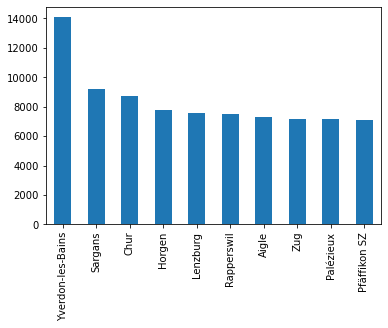

In [14]:
df_park_sail["facility_name"].value_counts().head(10).plot.bar()

In [26]:
# sorting based on station name 
grouped_fname = df_park_sail.groupby("facility_name") 

array([[<AxesSubplot:title={'center':'1.0'}>,
        <AxesSubplot:title={'center':'2.0'}>,
        <AxesSubplot:title={'center':'6.0'}>,
        <AxesSubplot:title={'center':'7.0'}>],
       [<AxesSubplot:title={'center':'9.0'}>,
        <AxesSubplot:title={'center':'10.0'}>,
        <AxesSubplot:title={'center':'12.0'}>,
        <AxesSubplot:title={'center':'14.0'}>],
       [<AxesSubplot:title={'center':'24.0'}>,
        <AxesSubplot:title={'center':'48.0'}>,
        <AxesSubplot:title={'center':'72.0'}>,
        <AxesSubplot:title={'center':'108.0'}>],
       [<AxesSubplot:title={'center':'144.0'}>,
        <AxesSubplot:title={'center':'146.0'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

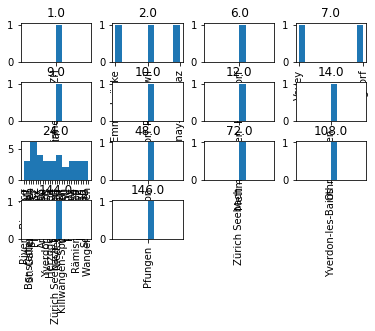

In [31]:
# df_1 = df_park_sail[:50]
# df_1["facility_name"].hist(by=df_1["dt"])

In [22]:
grouped_fname.describe()

dt                                         \
                               count       mean        std  min   25%   50%   
facility_name                                                                 
Aadorf                         753.0  23.916335  11.378388  1.0  24.0  24.0   
Aarberg                        165.0  12.763636  12.736011  1.0   3.0   8.0   
Aarburg-Oftringen              405.0  24.953086  16.710857  1.0  24.0  24.0   
Aathal                         304.0  19.934211  23.170674  1.0   4.0  24.0   
Aefligen (BLS)                   4.0  14.500000  10.969655  5.0   5.0  14.5   
...                              ...        ...        ...  ...   ...   ...   
Zwingen                        285.0  26.459649  20.954577  1.0  24.0  24.0   
Zäziwil                        162.0  23.320988   9.740518  1.0  24.0  24.0   
Zürich Altstetten / Westlink    98.0  11.663265  14.282816  1.0   2.0   5.0   
Zürich Seebach                 676.0  59.545858  53.638372  1.0  24.0  24.0   
Zürich Tiefenbrunnen          5859.0  14.727769  13.271882  1.0   3.0  16.0   

                                           
                               75%    max  
facility_name                              
Aadorf                        24.0  168.0  
Aarberg                       24.0   77.0  
Aarburg-Oftringen             24.0  168.0  
Aathal                        24.0  167.0  
Aefligen (BLS)                24.0   24.0  
...                            ...    ...  
Zwingen                       24.0  168.0  
Zäziwil                       24.0   78.0  
Zürich Altstetten / Westlink  24.0   97.0  
Zürich Seebach                96.0  169.0  
Zürich Tiefenbrunnen          24.0  168.0  

[552 rows x 8 columns]

# Use case  (City of Bern)

1. select a trail station based on the parking capacity and occupancy 
     * select a show case city / train station with the largest parking occupancy / train schedule and destinations 
     * extract the city / neighbrhood information (population / official vacation days / Demographic information )
2. try to create a customized dataset from available data sources 
3. using a simple regression model to predict 
    * occupancy of the parking space 
    * passangers with car density
 




In [11]:
df_park_places = pd.read_csv(DATA_MOBILITY,sep=';' ,error_bad_lines=False).fillna(0)
df_park_places_r = pd.DataFrame({"stationsbezeichnung" : df_park_places["stationsbezeichnung"],
                                 "Name Haltestelle" : df_park_places["Name Haltestelle"],
                                "parkrail_anzahl": df_park_places["parkrail_anzahl"]})

In [34]:
df_park_places_r.loc[df_park_places_r["parkrail_anzahl"].argmax()]

stationsbezeichnung    Bern
Name Haltestelle       Bern
parkrail_anzahl         500
Name: 747, dtype: object

In [59]:
# selecte all the parkrail in the city of bern 
df_park_sail_raw = pd.read_csv(DATA_PARKRAIL_SAIL,sep=';' ,error_bad_lines=False)
df_park_sail = df_park_sail_raw.drop(["created", "updated", "verified_payment", "booking_status"], axis = 1)
df_park_sail["start"] = df_park_sail['start'].apply(lambda x: pd.Timestamp(x).tz_localize(None))
df_park_sail["end"] = df_park_sail['end'].apply(lambda x: pd.Timestamp(x).tz_localize(None))
df_park_sail["dt"] = (df_park_sail["end"] - df_park_sail["start"]) / pd.Timedelta(hours=1)
df_park_sail

,start,end,facility_name,facility_uuid,dt
174,2020-04-23 11:40:00,2020-04-23 19:40:00,Bern Bümpliz Süd,7d38d0fa-5559-4083-9565-b4457a106478,8.0
210,2020-04-22 13:55:00,2020-04-23 13:55:00,Bern Bümpliz Süd,7d38d0fa-5559-4083-9565-b4457a106478,24.0
443,2020-04-17 09:55:00,2020-04-18 09:55:00,Bern Bümpliz Süd,7d38d0fa-5559-4083-9565-b4457a106478,24.0
786,2020-04-07 11:05:00,2020-04-08 11:05:00,Bern Bümpliz Süd,7d38d0fa-5559-4083-9565-b4457a106478,24.0
915,2020-04-03 12:10:00,2020-04-04 12:10:00,Bern Bümpliz Süd,7d38d0fa-5559-4083-9565-b4457a106478,24.0
...,...,...,...,...,...
450410,2021-02-08 07:05:00,2021-02-09 07:05:00,Bern Bümpliz Süd,7d38d0fa-5559-4083-9565-b4457a106478,24.0
451100,2021-02-03 07:25:00,2021-02-04 07:25:00,Bern Bümpliz Süd,7d38d0fa-5559-4083-9565-b4457a106478,24.0
451190,2021-02-02 09:55:00,2021-02-03 09:55:00,Bern Bümpliz Süd,7d38d0fa-5559-4083-9565-b4457a106478,24.0
451204,2021-02-02 09:20:00,2021-02-03 12:20:00,Bern Bümpliz Süd,7d38d0fa-5559-4083-9565-b4457a106478,27.0


In [62]:
# facility_uuid_bern = df_sail_bern_sbb["facility_uuid"][0]
facility_uuid_bern  = "7d38d0fa-5559-4083-9565-b4457a106478"

In [73]:
df_park_sail_C_raw = pd.read_csv(DATA_PARKRAIL_SAIL_C,sep=';' ,error_bad_lines=False)
df_park_sail_C = df_park_sail_C_raw.drop(["didok_id", "sales_channel", "created_at", "BPUIC" , "geopos"], axis = 1)
df_park_sail_C = df_park_sail_C.rename(columns={"parking_facility_uuid" : "facility_uuid",
                                    "Name Haltestelle" : "facility_name"})

column_names = ["start","end","facility_name","facility_uuid","dt"]
df_park_sail_C = df_park_sail_C.reindex(columns=column_names)
df_park_sail_C["start"] = df_park_sail_C['start'].apply(lambda x: pd.Timestamp(x).tz_localize(None))
df_park_sail_C["end"] = df_park_sail_C['end'].apply(lambda x: pd.Timestamp(x).tz_localize(None))
df_park_sail_C["dt"] = (df_park_sail_C["end"] - df_park_sail_C["start"]) / pd.Timedelta(hours=1)
df_park_sail_C

,start,end,facility_name,facility_uuid,dt
0,2020-01-25 01:00:00,2020-02-25 01:00:00,Münsingen,0aca6999-d48d-4c64-af07-90e22fedf367,744.0
1,2020-02-05 01:00:00,2021-02-05 01:00:00,Dübendorf,a2fa6e70-be34-45bd-a5f3-ca0eced8f6c2,8784.0
2,2020-02-05 01:00:00,2020-03-05 01:00:00,Fehraltorf,d1e19871-8d37-4347-aa2a-a18a9c575efc,696.0
3,2020-02-05 01:00:00,2020-03-05 01:00:00,Porrentruy,3aa9e036-53d2-4a5d-8af4-02cc51804119,696.0
4,2020-02-06 01:00:00,2020-03-06 01:00:00,Andelfingen,36dec172-4905-45dc-886b-fd0ea0deaaca,696.0
...,...,...,...,...,...
40470,2020-08-31 02:00:00,2020-09-01 02:00:00,Bad Ragaz,1c29f640-b703-43bd-95e8-36ae28263ef1,24.0
40471,2020-08-31 02:00:00,2020-09-06 02:00:00,Delémont,91301b92-be54-4a45-a463-5d1a9cc22b71,144.0
40472,2020-08-29 02:00:00,2020-08-30 02:00:00,Giubiasco,d4fd6d5a-a59a-4282-aed4-31d5aff17a91,24.0
40473,2020-07-23 02:00:00,2020-07-26 02:00:00,Maienfeld,6a2980a2-4d63-4539-8f02-a240a2d1544f,72.0


In [83]:
df_sail_bern_sbb =  df_park_sail.loc[df_park_sail['facility_uuid'] == facility_uuid_bern]
df_sail_bern_other =  df_park_sail_C.loc[df_park_sail_C['facility_uuid'] == facility_uuid_bern]

In [127]:
facility_name = "Bern Bümpliz Süd"
df_sail_merge = pd.concat([df_sail_bern_sbb, df_sail_bern_other])
df_sail_sorted = df_sail_merge.sort_values(by="start")
df_sail_sorted = df_sail_sorted.drop(["facility_uuid", "facility_name"], axis=1)
df_sail_sorted

,start,end,dt
62875,2020-01-03 08:35:00,2020-01-04 08:35:00,24.0
337156,2020-01-04 08:25:00,2020-01-05 08:25:00,24.0
253592,2020-01-04 09:30:00,2020-01-05 09:30:00,24.0
248513,2020-01-05 14:30:00,2020-01-05 16:30:00,2.0
174702,2020-01-05 21:00:00,2020-01-06 21:00:00,24.0
...,...,...,...
138273,2021-02-21 14:25:00,2021-02-27 14:25:00,144.0
58394,2021-02-21 20:05:00,2021-02-22 20:05:00,24.0
152701,2021-02-22 07:55:00,2021-02-23 07:55:00,24.0
152653,2021-02-22 08:10:00,2021-02-23 08:10:00,24.0


In [128]:
# build the distribution monthly on the duration time and number of booked ticket
df_groupby_year = df_sail_sorted.groupby([df_sail_sorted["start"].dt.year])
year_2020 = list(df_groupby_year)[0][1]
year_2021 = list(df_groupby_year)[1][1]

In [130]:
df_groupby_month = df_sail_sorted.groupby([df_sail_sorted["start"].dt.month])
monthly = list(df_groupby_month)
monthly 

[(1,
                       start                 end     dt
  62875  2020-01-03 08:35:00 2020-01-04 08:35:00   24.0
  337156 2020-01-04 08:25:00 2020-01-05 08:25:00   24.0
  253592 2020-01-04 09:30:00 2020-01-05 09:30:00   24.0
  248513 2020-01-05 14:30:00 2020-01-05 16:30:00    2.0
  174702 2020-01-05 21:00:00 2020-01-06 21:00:00   24.0
  ...                    ...                 ...    ...
  9430   2021-01-30 01:00:00 2021-01-31 06:00:00   29.0
  57550  2021-01-30 11:20:00 2021-01-31 11:20:00   24.0
  151513 2021-01-30 15:40:00 2021-01-31 15:40:00   24.0
  3363   2021-01-31 01:00:00 2021-03-01 01:00:00  696.0
  115965 2021-01-31 11:20:00 2021-01-31 12:20:00    1.0
  
  [260 rows x 3 columns]),
 (2,
                       start                 end     dt
  324836 2020-02-01 07:20:00 2020-02-01 17:20:00   10.0
  324761 2020-02-01 08:20:00 2020-02-02 08:20:00   24.0
  164462 2020-02-01 13:05:00 2020-02-02 13:05:00   24.0
  96057  2020-02-03 08:15:00 2020-02-10 08:15:00  168.0
  163547

In [104]:
## include parkrail pricing 
df_mobility = pd.read_csv(DATA_MOBILITY ,sep=';' ,error_bad_lines=False).fillna(0)
df_park_info = pd.DataFrame({"stationsbezeichnung" : df_mobility["stationsbezeichnung"],
                                "parkrail_anzahl" : df_mobility["parkrail_anzahl"],
                                "parkrail_preis_tag": df_mobility["parkrail_preis_tag"],
                                "parkrail_preis_monat": df_mobility["parkrail_preis_monat"],
                                "parkrail_preis_jahr": df_mobility["parkrail_preis_jahr"],
                                "parkrail_pflichtig_zeit1": df_mobility["parkrail_pflichtig_zeit1"],
                                "Name Haltestelle": df_mobility["Name Haltestelle"]})
df_park_info

,stationsbezeichnung,parkrail_anzahl,parkrail_preis_tag,parkrail_preis_monat,parkrail_preis_jahr,parkrail_pflichtig_zeit1,Name Haltestelle
0,Basel SBB,0.0,0.0,0.0,0.0,0,Basel SBB
1,Basel SBB,0.0,0.0,0.0,0.0,0,Basel SBB
2,Basel SBB,0.0,0.0,0.0,0.0,0,Basel SBB
3,Basel SBB,0.0,0.0,0.0,0.0,0,Basel SBB
4,Basel SBB,0.0,0.0,0.0,0.0,0,Basel SBB
...,...,...,...,...,...,...,...
827,Buchrain,0.0,0.0,0.0,0.0,0,Buchrain
828,Baldegg Kloster,0.0,0.0,0.0,0.0,0,Baldegg Kloster
829,Kerzers Papiliorama,0.0,0.0,0.0,0.0,0,Kerzers Papiliorama
830,Pratteln Salina Raurica,0.0,0.0,0.0,0.0,0,Pratteln Salina Raurica


In [115]:
df_park_info_bern = df_park_info[(df_park_info['stationsbezeichnung'].isin(["Bern", "Bern Wankdorf", "Bern Europaplatz", "Bern Wankdorf", "Bern Bümpliz Süd"]))]
df_park_info_bern

,stationsbezeichnung,parkrail_anzahl,parkrail_preis_tag,parkrail_preis_monat,parkrail_preis_jahr,parkrail_pflichtig_zeit1,Name Haltestelle
495,Bern Bümpliz Süd,32.0,6.0,60.0,600.0,00.00 - 24.00,Bern Bümpliz Süd
496,Bern Europaplatz,0.0,0.0,0.0,0.0,0,Bern Europaplatz
747,Bern,500.0,0.0,0.0,0.0,00.00 - 24.00,Bern
819,Bern Wankdorf,8.0,10.0,0.0,0.0,00.00 - 24.00,Bern Wankdorf
820,Bern Wankdorf,8.0,10.0,0.0,0.0,00.00 - 24.00,Bern Wankdorf
